In [1]:
import pandas as pd
import os, sys
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#para definir la ruta de los directorios
from pathlib import Path
current_dir = Path('.').resolve()
project_dir = Path(current_dir).parent

In [2]:
print(current_dir)
print(project_dir)

/home/jupyter/ESEIT_BigData/notebooks
/home/jupyter/ESEIT_BigData


# Read Data

In [3]:
file_data = os.path.join(project_dir, 'data', 'raw','UCI_Credit_Card.csv')
data = pd.read_csv(file_data, header= None)

In [4]:
data = pd.read_csv(file_data)

# Check Data

In [5]:
data = pd.DataFrame(data)
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
data.groupby(['default.payment.next.month']).count()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,...,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364
1,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,...,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636


# DESCRIPCION DE VARIABLES CATEGORIGAS
SEX       =   1=masculino, 2=femenino  
EDUCATION =   1=escuela de posgrado, 2=universidad, 3=escuela secundaria, 4=otros, 5=desconocido, 6=desconocido  
MARRIAGE  =   1=casado, 2=soltero, 3=otros  
default.payment.next.month: Default payment (1=INCUMPLIRA PAGO, 0=CUMPLIRA EL PAGO)

# Análisis de los resultados del describe
1. Hay 30.000 clientes distintos de tarjetas de crédito. 
2. El valor promedio de la cantidad de límite de la tarjeta de crédito es 167.484 USD. La desviación estándar es grande $ 129747.66 USD, siendo el valor máximo de 1M USD. 
3. El nivel educativo es mayoritariamente de posgrado y universitario.  
4. Los clientes son mayoritariamente femenino
5. La edad promedio es de 35,5 años, con una desviación estándar de 9,2.

## PREPARACION DE LA DATA

In [9]:
# comprobando si falta algún dato.
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


,ID,BILL_AMT2,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,...,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,default.payment.next.month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = pd.DataFrame(data, columns=['PAY_0','PAY_2','PAY_3','PAY_4'])
df

,PAY_0,PAY_2,PAY_3,PAY_4
0,2,2,-1,-1
1,-1,2,0,0
2,0,0,0,0
3,0,0,0,0
4,-1,0,-1,0
...,...,...,...,...
29995,0,0,0,0
29996,-1,-1,-1,-1
29997,4,3,2,-1
29998,1,-1,0,0


In [11]:
#for col in df:
 #   columns="{}".format(col)
  #  print(columns)
   # data.loc[data.columns>0, columns]=1

In [12]:
data[data < 0] = 0

In [13]:
df = pd.DataFrame(data, columns=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
df

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,0,0,0,0
1,0,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,0,0,0,0,0,0
29997,4,3,2,0,0,0
29998,1,0,0,0,0,0


In [14]:
"""for col in df:
    columns="{}".format(col)
    data[columns].replace(2, 1, inplace=True)
    data[columns].replace(3, 1, inplace=True)
    data[columns].replace(4, 1, inplace=True)
    data[columns].replace(5, 1, inplace=True)
    data[columns].replace(6, 1, inplace=True)
    data[columns].replace(7, 1, inplace=True)
    data[columns].replace(8, 1, inplace=True)
    data[columns].replace(9, 1, inplace=True)"""  

'for col in df:\n    columns="{}".format(col)\n    data[columns].replace(2, 1, inplace=True)\n    data[columns].replace(3, 1, inplace=True)\n    data[columns].replace(4, 1, inplace=True)\n    data[columns].replace(5, 1, inplace=True)\n    data[columns].replace(6, 1, inplace=True)\n    data[columns].replace(7, 1, inplace=True)\n    data[columns].replace(8, 1, inplace=True)\n    data[columns].replace(9, 1, inplace=True)'

In [15]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

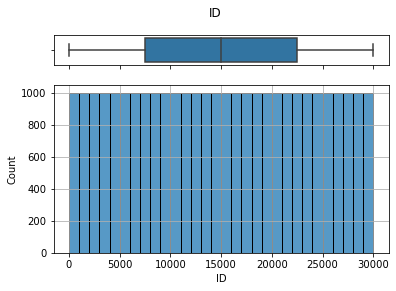

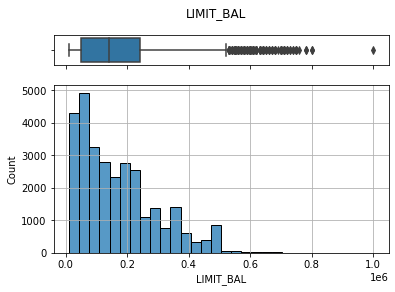

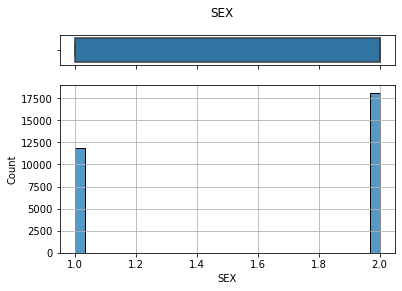

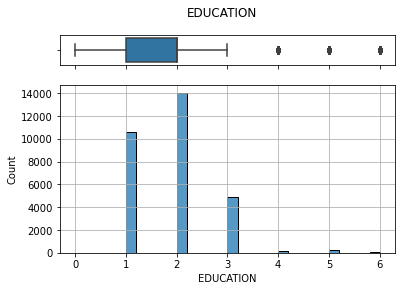

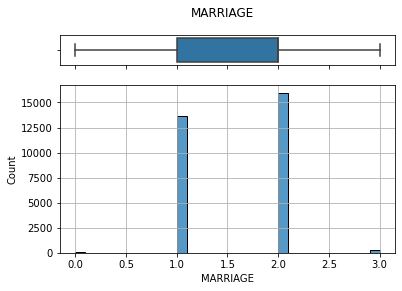

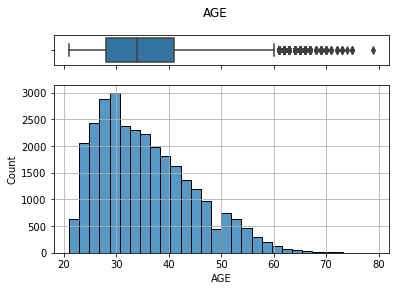

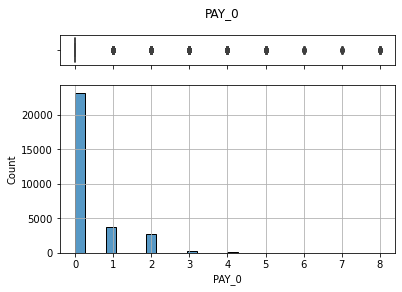

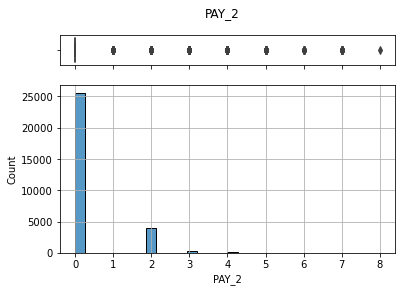

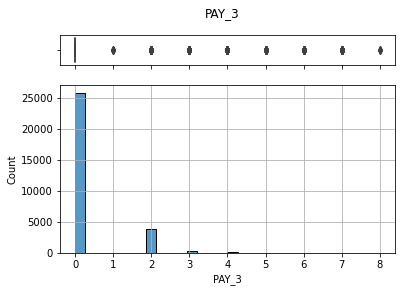

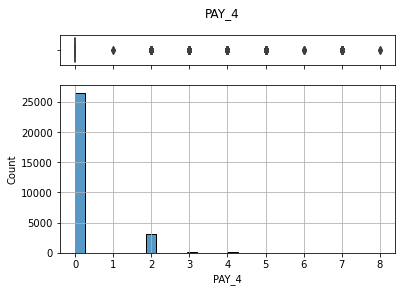

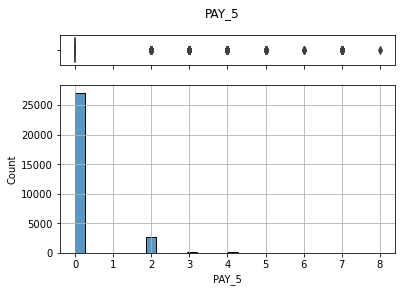

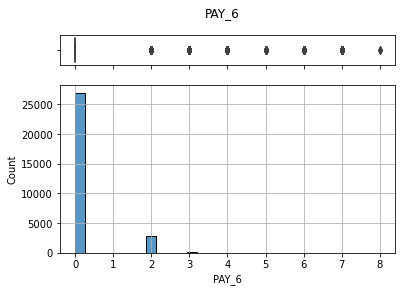

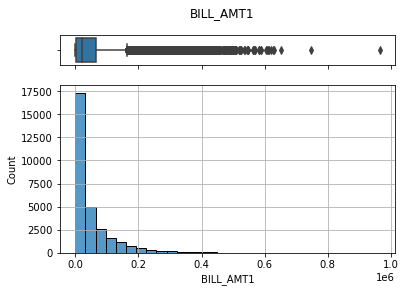

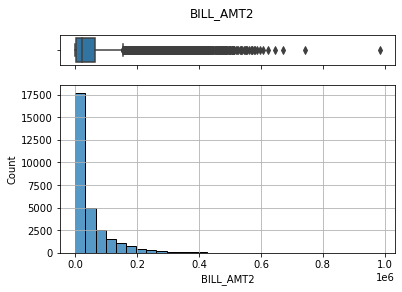

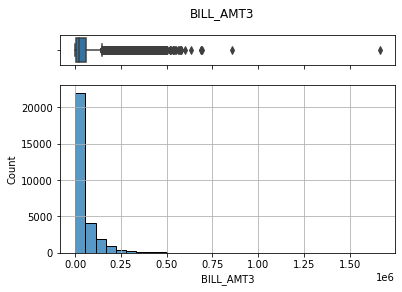

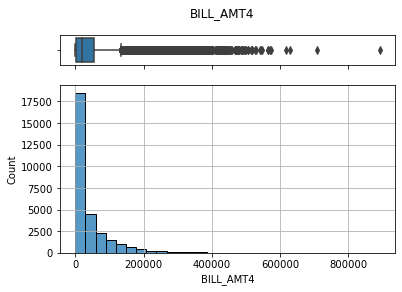

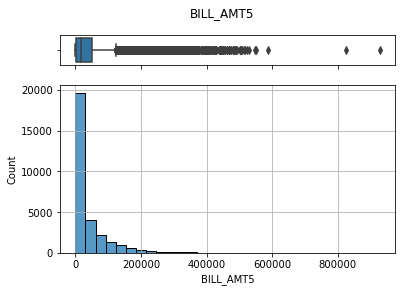

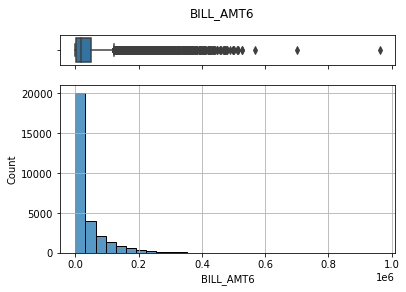

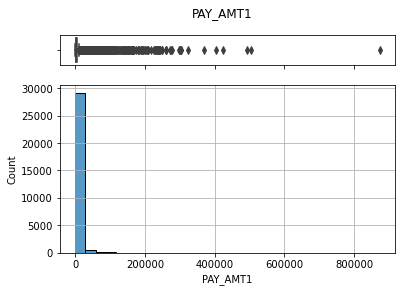

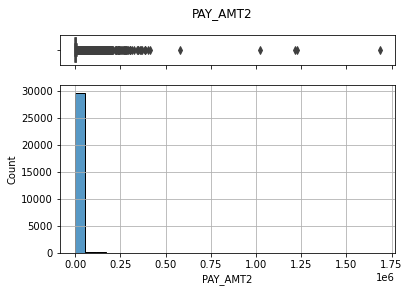

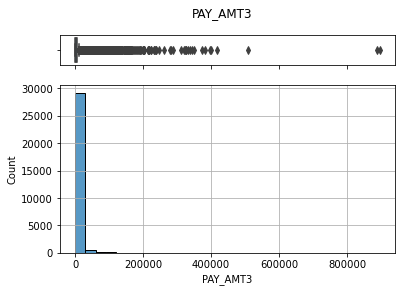

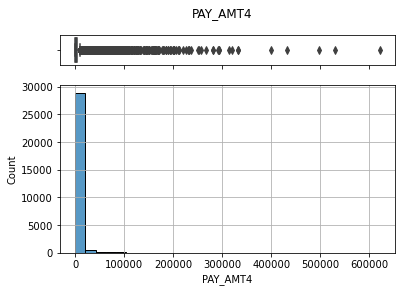

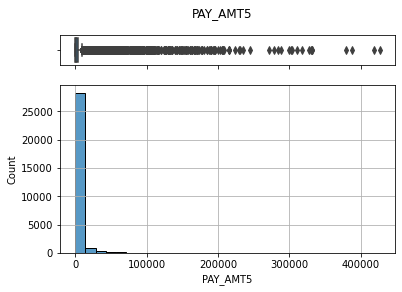

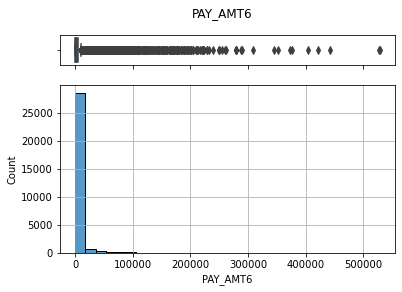

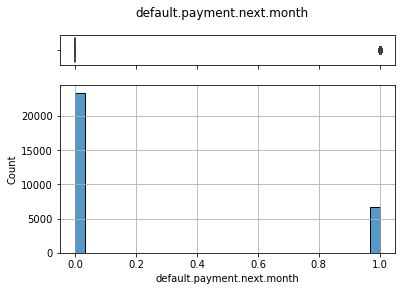

In [17]:
for col in data:
            column="{}".format(col)
            f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
            sns.boxplot(data[column], ax=ax_box)
            sns.histplot(data=data, x=column, bins=30, ax=ax_hist)
            ax_box.set(xlabel='')
            plt.suptitle(column)
            ax_hist.grid()

Análisis de las Graficas resultados del describe

LIMIT_BAL: Se encontró que la mayoria de los montos de los creditos otorgados oscilan entre los 1000 y los 10000, despues de este valor hay creditos por valores mas altos pero en menor cantidad que corresponden a los datos atipicos que se observan en la grafica box plot.
SEX: De acuerdo con la data del archivo la mayoria de los clientes son de genero fenenino.
EDUCATION: De acuerdo cono la data la mayoria de clientes con creditos son personas con niveles educativos de graduadados y universitarios.
MARRIAGE: Se entro que la mayoria de clientes con creditos son personas casadas.
AGE: De acuerdo con la data del archivo, la edad de la mayoria de clientes se concentra entre los 28 y los 40 años de edad, se observo tambien algunos datos atipicos los cuales corresponde a personas de mas de 60 años de edad.
PAY: De acuerdo con la graficas de habitos de pago, se encontro que el 80% de las personas hace el pago de sus obligaciones debidamente.
default.payment.next.month: De acuerdo con la informacion de la data se evidencio que 80% de los clientes haria el pago de sus creditos. 

LOG TRANSFORM

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


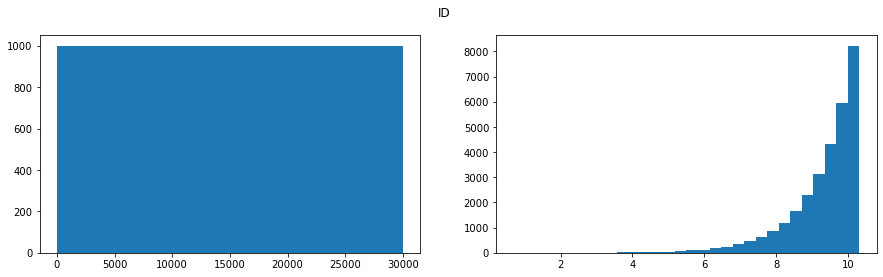

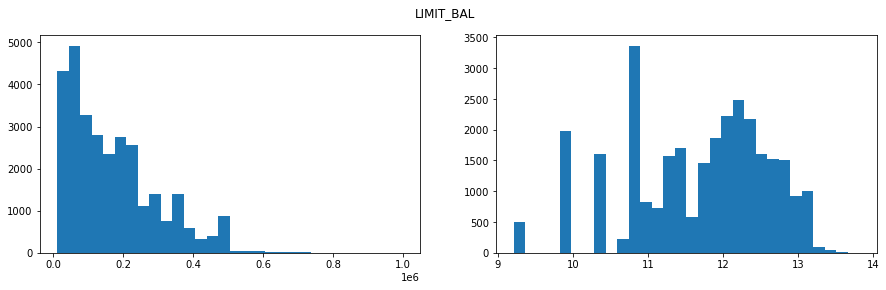

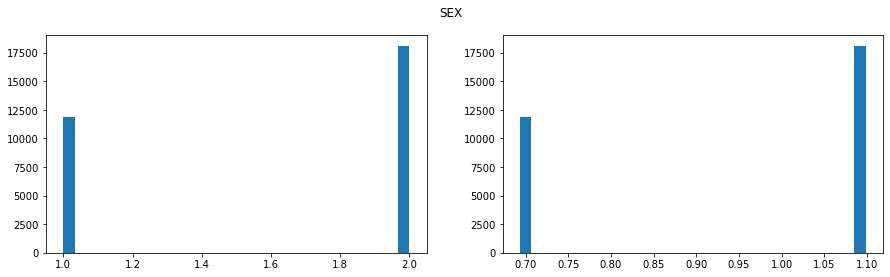

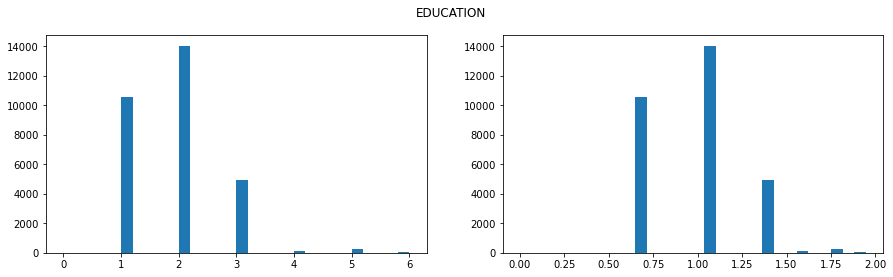

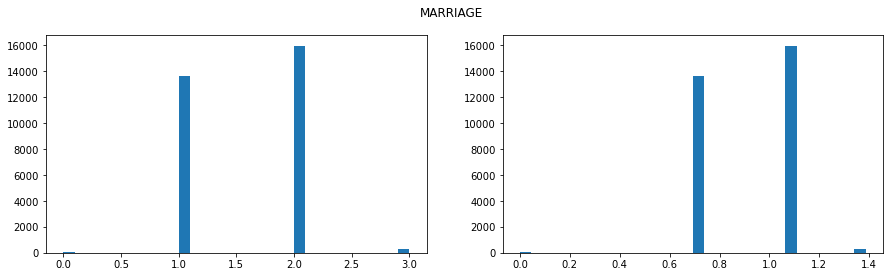

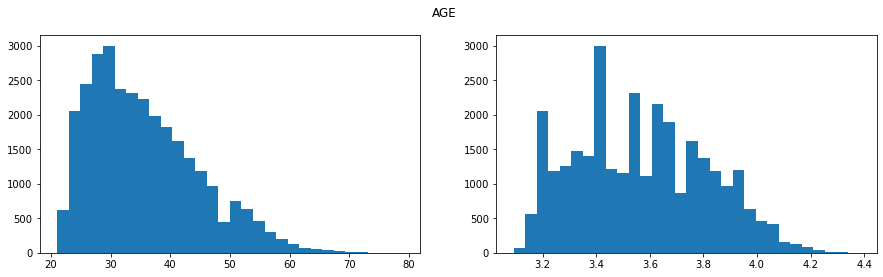

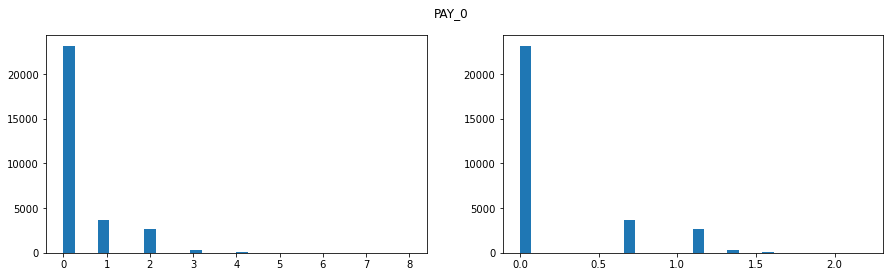

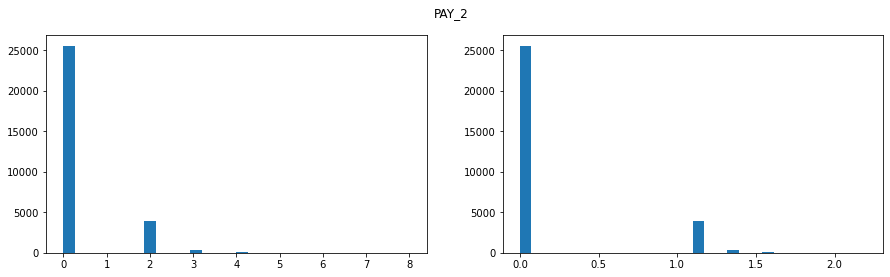

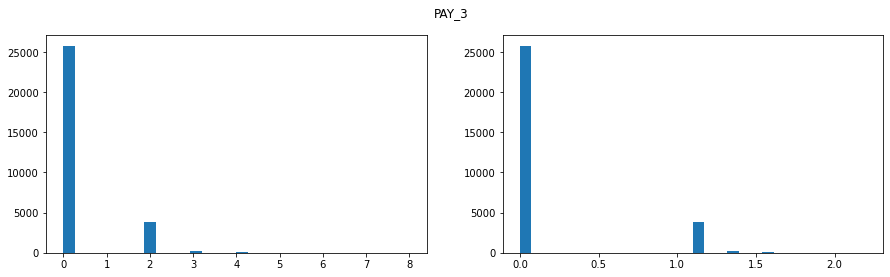

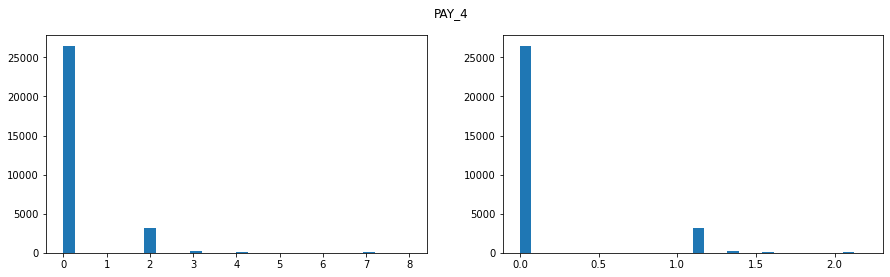

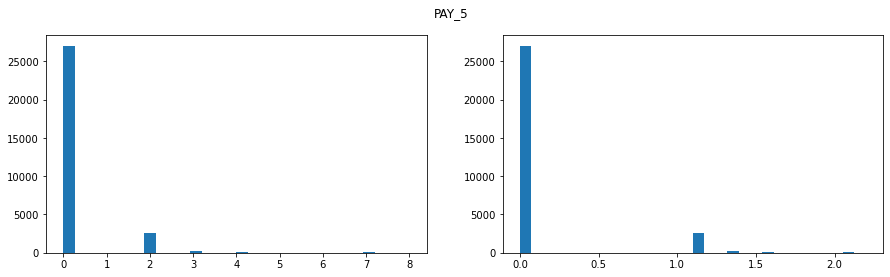

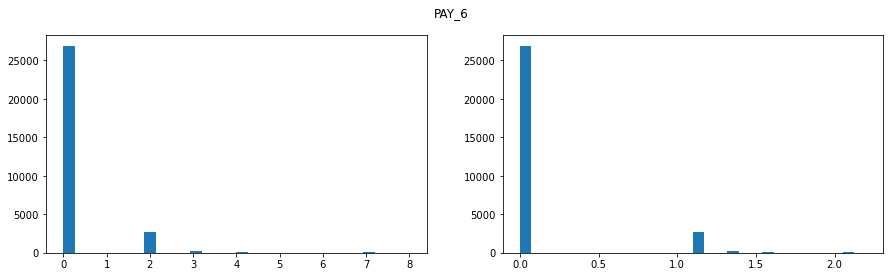

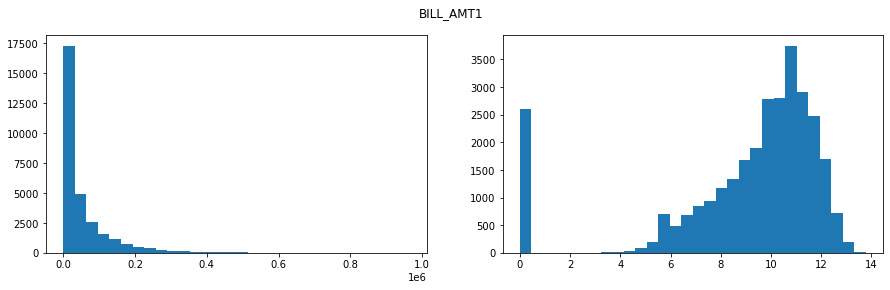

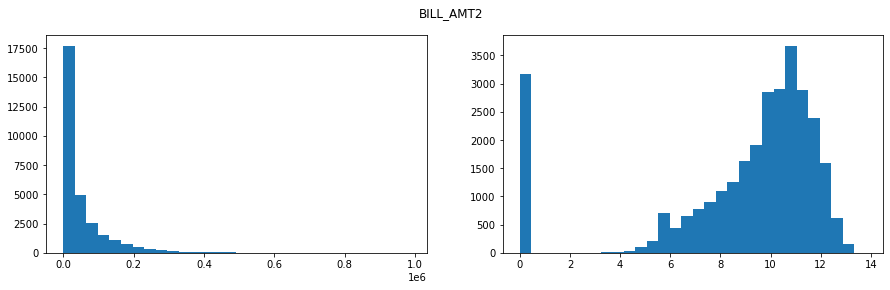

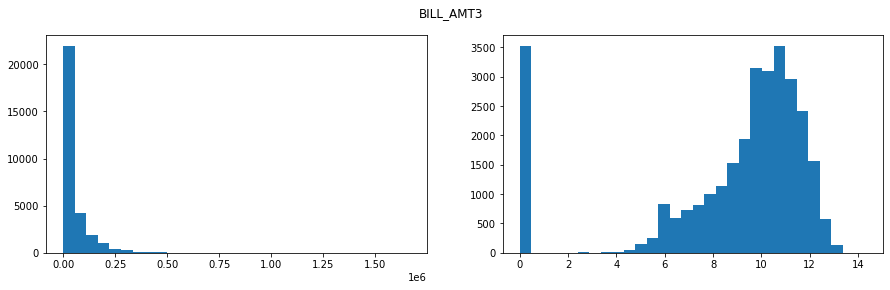

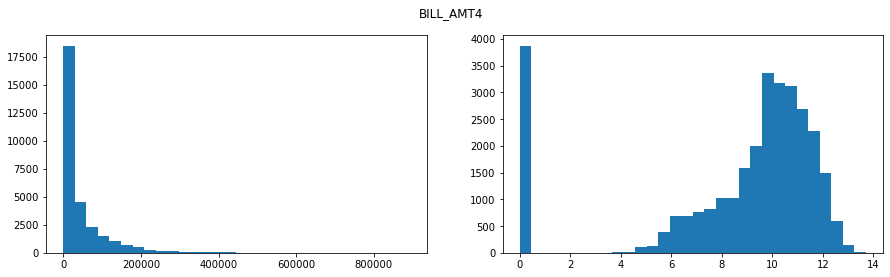

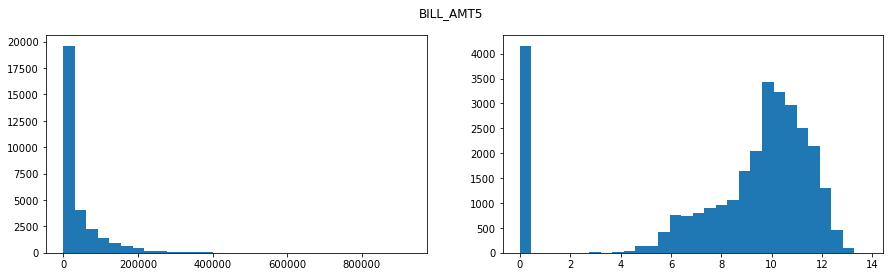

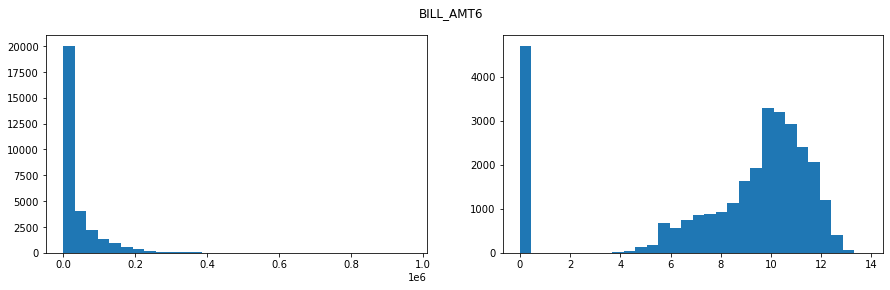

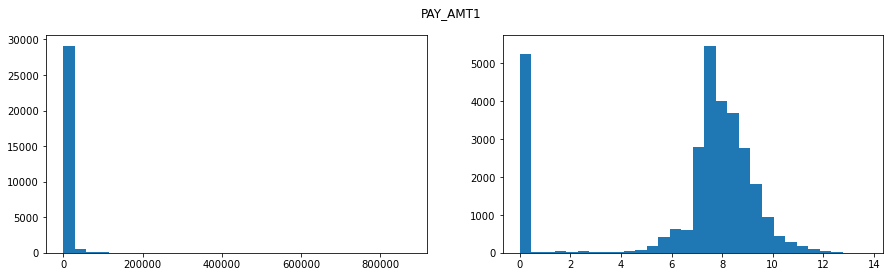

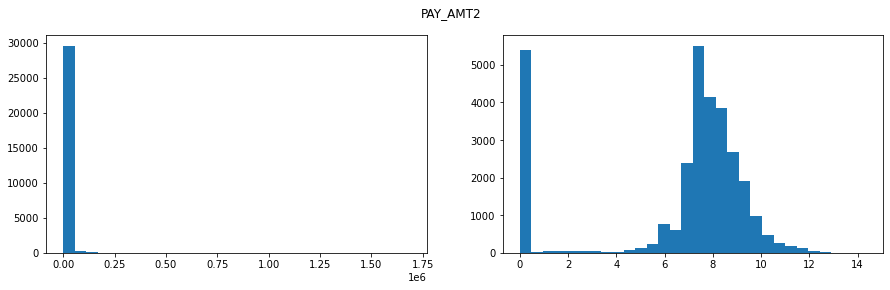

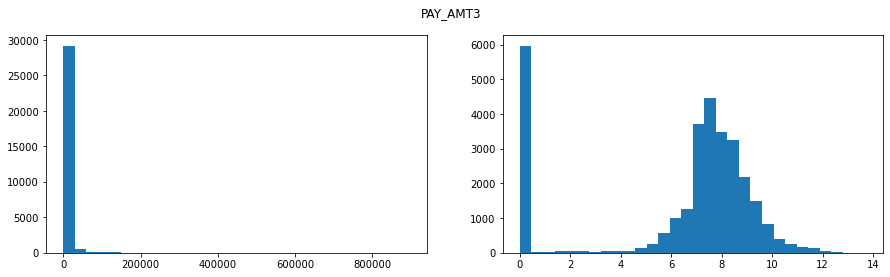

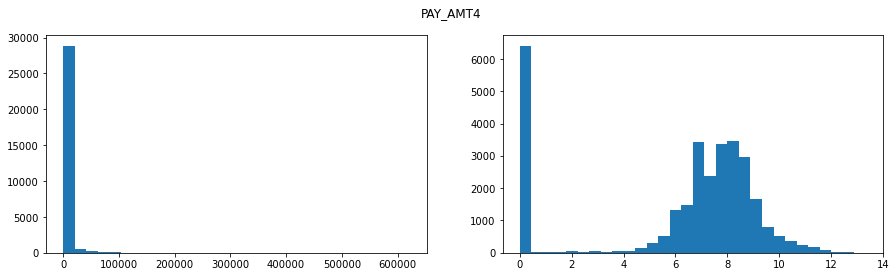

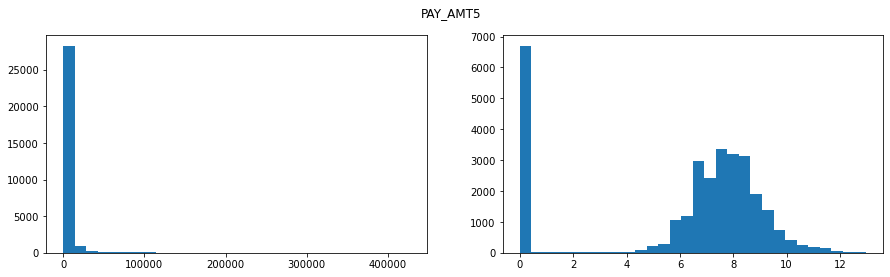

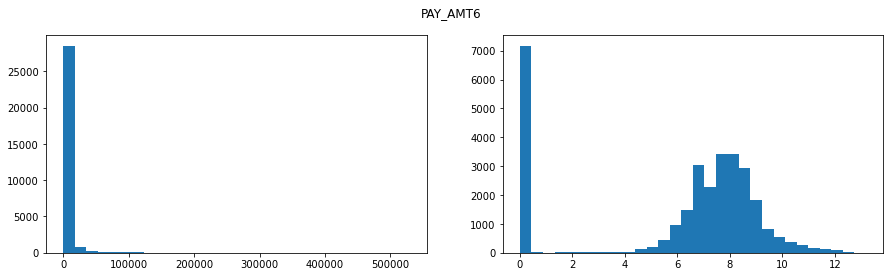

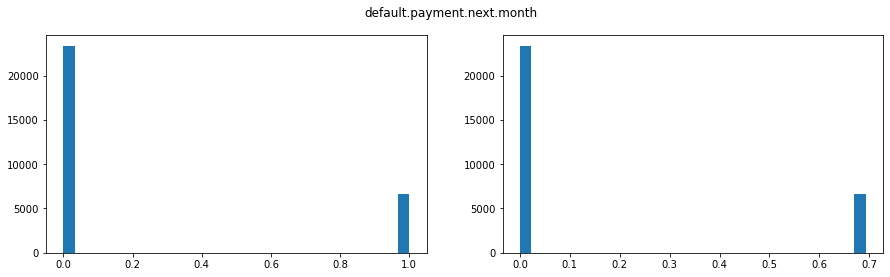

In [18]:
for col in data:
    column="{}".format(col)
    x= data[column]
    log_x=np.log(x+1)
    f, ax=plt.subplots(1,2, figsize=(15,4))
    ax[0].hist(x, bins=30)
    plt.suptitle(column)
    ax[1].hist(log_x, bins=30);

CORRELACION ENTRE VARIABLES

<AxesSubplot:>

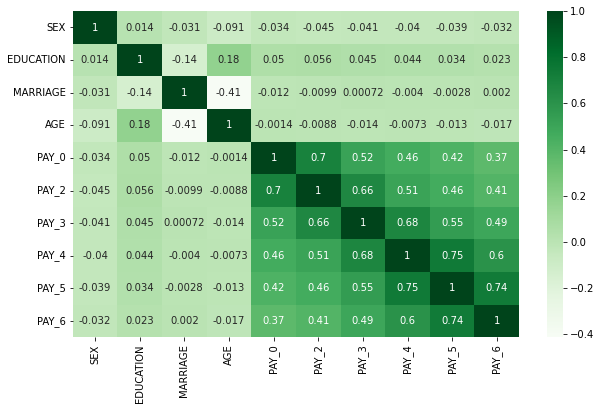

In [19]:
cols=['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
correlations=data[cols].corr()
plt.subplots(figsize=(10,6))
sns.heatmap(correlations, cmap='Greens',annot=True)

No se observo una correlacion alta entre las variales SEX, EDUCATION, MARRIAGE y AGE vs el registro de pagos realizados. 

In [20]:
y_target = data['default.payment.next.month']

In [21]:
data = pd.DataFrame(data, columns=['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
data.describe()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


# Entrenamiento del modelo

In [22]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_target, test_size=0.3, random_state=42)

In [23]:
X_train.shape

(21000, 10)

In [24]:
data.describe()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567
std,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000


In [25]:
"""from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer"""

'from sklearn.preprocessing import MinMaxScaler, StandardScaler\nfrom sklearn.compose import ColumnTransformer'

In [26]:
"""preprocesor = ColumnTransformer(transformers=[("original", 'passthrough', ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']),
                                               ("standard", StandardScaler(), ['AGE']),
                                             ])"""

'preprocesor = ColumnTransformer(transformers=[("original", \'passthrough\', [\'SEX\', \'EDUCATION\', \'MARRIAGE\',\'PAY_0\',\'PAY_2\',\'PAY_3\',\'PAY_4\',\'PAY_5\',\'PAY_6\']),\n                                               ("standard", StandardScaler(), [\'AGE\']),\n                                             ])'

In [27]:
data_train = X_train
data_test = X_test

<AxesSubplot:>

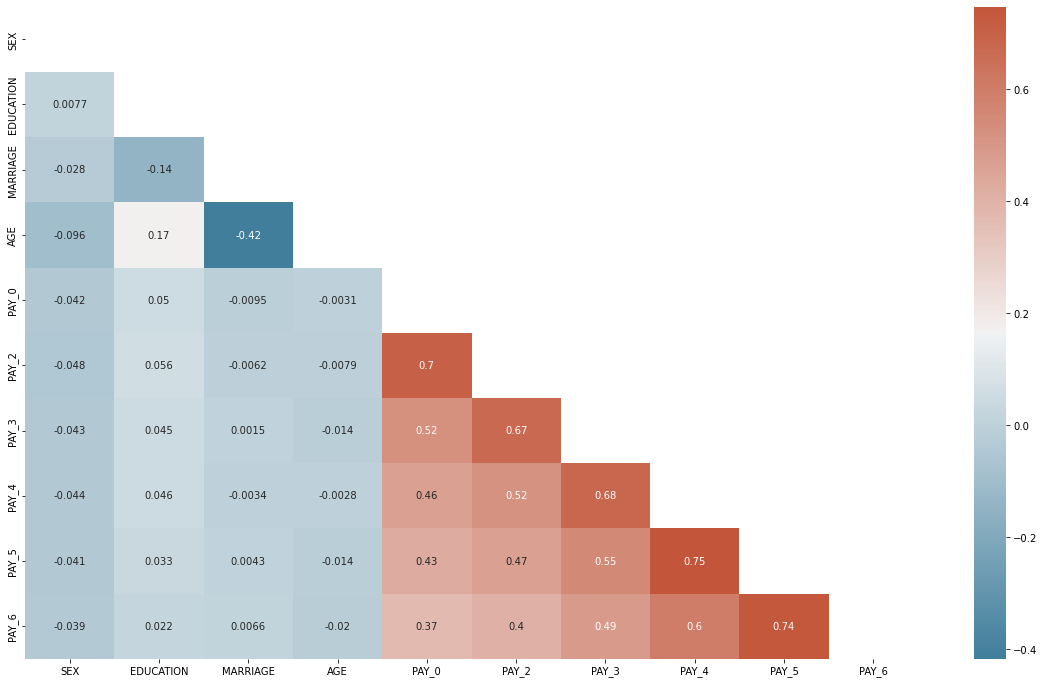

In [28]:
plt.figure(figsize = (20, 12))

corr_matrix = data_train.corr()  #correlacion entre las columnas de entrenamiento
#mask: mascara a la matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))#trui matrix triangular inferior
#ones uno, cuando sea uno reemplacelo por la matrix de correlacion

cmap = sns.diverging_palette(230, 20, as_cmap=True) 
#cmap, pintar de colores mapa de calor, diverging_palette: paleta divergente

sns.heatmap(
    corr_matrix,
    mask = mask,
    cmap = cmap,
    annot = True,
)

In [29]:
corr_matrix = corr_matrix.abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.8)]

X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)
X_train.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
28465,2,1,1,40,0,0,0,0,0,0
27622,2,1,2,23,0,0,0,0,0,0
28376,2,2,1,36,2,2,2,2,0,0
10917,2,3,1,54,6,5,4,3,2,2
27234,1,1,1,35,0,0,0,0,0,0


PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(0.95).fit(data_train)
x_train_pca = pca.transform(data_train)
x_test_pca = pca.transform(data_test)

In [31]:
pca.explained_variance_ratio_

array([0.94940035, 0.02454068])

In [32]:
pca.explained_variance_ratio_
rows = X_train.columns

columns = []
for i in range(2):
    columns.append('PC_{}'.format(i+1))

feature_importance = pd.DataFrame(
    pca.components_.T,
    index=rows,
    columns=columns
)   
feature_importance

,PC_1,PC_2
SEX,-0.005089,-0.020176
EDUCATION,0.014675,0.041200
MARRIAGE,-0.023676,-0.003209
AGE,0.999596,0.001259
PAY_0,-0.000266,0.378683
PAY_2,-0.000700,0.437856
PAY_3,-0.001225,0.445205
PAY_4,-0.000246,0.431903
PAY_5,-0.001115,0.390772
PAY_6,-0.001546,0.353999


In [33]:
total_var = pca.explained_variance_ratio_.sum() *100
total_var

97.39410343012702

De acuerdo con lo anterior observamos que con las variales obtenidas mediente el metodo PCA conseguimos 97% de la varianza de la data.

In [34]:
variance_ratios = pd.DataFrame(
    pca.explained_variance_ratio_.reshape(1,2),
    columns=columns,
    index=['Explined Variance Ratio']
)
variance_ratios

,PC_1,PC_2
Explined Variance Ratio,0.9494,0.024541


In [35]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(data_train, y_train)

SVC(random_state=42)

In [36]:
svc.fit(x_train_pca, y_train)

SVC(random_state=42)

In [37]:
y_pred = svc.predict(x_test_pca)

In [38]:
from sklearn.metrics import classification_report
print(
    classification_report(y_test, y_pred)
)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7040
           1       0.64      0.19      0.30      1960

    accuracy                           0.80      9000
   macro avg       0.73      0.58      0.59      9000
weighted avg       0.78      0.80      0.76      9000



In [39]:
svc.predict(x_test_pca[100].reshape(1,-1))

array([0])

In [40]:
x_test_pca[0].flatten()

array([-10.50003902,  -0.68887461])

In [41]:
y_test

2308     0
22404    0
23397    0
25058    0
2664     1
        ..
3941     1
17854    0
95       0
6279     0
26428    0
Name: default.payment.next.month, Length: 9000, dtype: int64

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
print(x_test_pca)

[[-10.50003902  -0.68887461]
 [ -9.52020691  -0.74899093]
 [ -3.46960439  -0.65582837]
 ...
 [ -0.50407763  -0.67628451]
 [  0.51410531  -0.69199201]
 [  0.49943046  -0.73319168]]


MODELO DE REGRESION LINEAL

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_pca, y_train)

LogisticRegression()

In [45]:
print('Hyperparameters')
lr.get_params()

Hyperparameters


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

C: Regularizacion del modelo 1.0 (Reducir el overfitting)
Penalty: Se tiene controlado el ajuste del modelo
Tol: tenemos un criterio de tolerencia de 0.0001

In [46]:
y_pred = lr.predict(x_test_pca)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([8292,  708]))

In [47]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([7040, 1960]))

<BarContainer object of 2 artists>

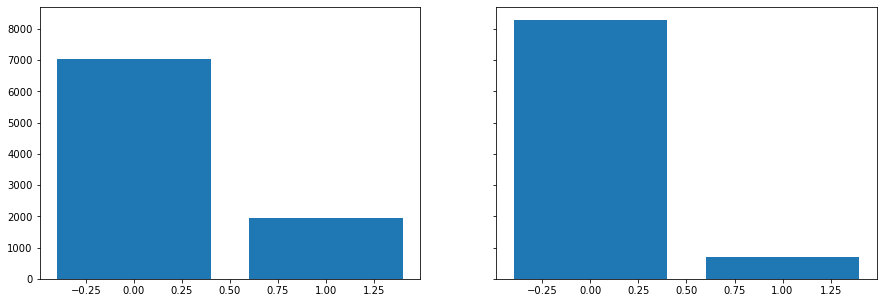

In [48]:
labels_true, values_true = np.unique(y_test, return_counts=True)
labels_pred, values_pred = np.unique(y_pred, return_counts=True)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5), sharey=True)
ax[0].bar(labels_true, values_true)
ax[1].bar(labels_pred, values_pred)

In [49]:
from sklearn.metrics import confusion_matrix

lr_conf_matrix = confusion_matrix(y_test, y_pred)

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
lr_conf_matrix

array([[6775,  265],
       [1517,  443]])

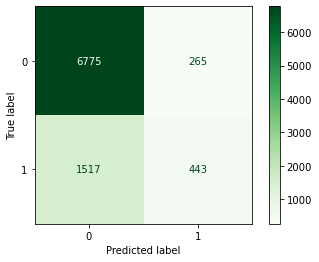

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, x_test_pca, y_test, cmap="Greens")

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Logistic Regression Performance:')
print('Accuracy:                ', accuracy_score(y_test, y_pred))

print('Precission paga:         ', precision_score(y_test, y_pred, pos_label=0))
print('Precission No paga:      ', precision_score(y_test, y_pred, pos_label=1))

print('Recall paga              ', recall_score(y_test, y_pred, pos_label=0))
print('Recall No paga           ', recall_score(y_test, y_pred, pos_label=1))

print('F1-score paga:           ', f1_score(y_test, y_pred, pos_label=0))
print('F1-score No paga:        ', f1_score(y_test, y_pred, pos_label=1))

Logistic Regression Performance:
Accuracy:                 0.802
Precission paga:          0.8170525808007718
Precission No paga:       0.6257062146892656
Recall paga               0.9623579545454546
Recall No paga            0.2260204081632653
F1-score paga:            0.883772501956692
F1-score No paga:         0.3320839580209895


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


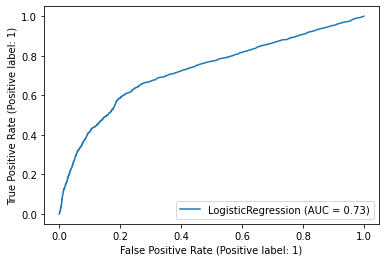

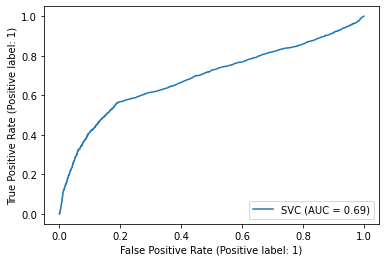

In [54]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, x_test_pca, y_test)
plot_roc_curve(svc, x_test_pca, y_test)

In [55]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(
    estimator=svc,
    X=x_train_pca,
    y=y_train,
    cv=10,
    n_jobs=1
)
print('CV accuracy: {} +/- {}'.format(
    np.round(np.mean(scores), 2),
    np.round(np.std(scores), 2)
))

CV accuracy: 0.8 +/- 0.01


De acuerdo con lo anterior tenemos que nuestro modelo predice el 80% de las personas que harian pagos de sus obligaciones.

In [56]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=svc,
    X = x_train_pca,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv=10,
    n_jobs=4
)

In [57]:
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

test_mean  = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

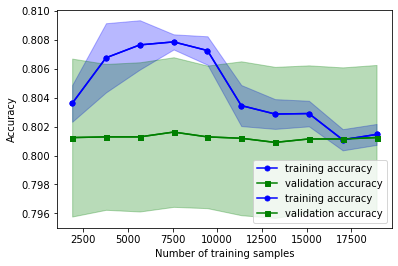

In [58]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [59]:
from sklearn.model_selection import GridSearchCV

values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4] 
red_parametros = [
    {'C': values, 'kernel': ['linear'] },
    {'C': values, 'kernel': ['rbf'], 'gamma':values}
]


gs = GridSearchCV(
    estimator  = svc,
    param_grid = red_parametros,
    scoring    = 'accuracy',
    cv         = 10,
    n_jobs     = 1
)

In [ ]:
gs = gs.fit(x_train_pca, y_train)
print(gs.best_score_)
print(gs.best_params_)